In [25]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from nemo import evaluate_nemo
import util
from topology import get_lognorm_hist
import topology
from util import evaluate
import pandas as pd
import random
from nemo import NemoSolver

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Topology Setup

In [26]:
df_plb = pd.read_csv("datasets/RIPEAtlas/month/time-0-day-2.csv", sep=",", header=None)
df_plb.replace(-1, pd.NA, inplace=True)

In [27]:
df_plb

,0,1,2,3,4,5,6,7,8,9,...,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821
0,2.913954,<NA>,10.071039,NaN,29.505642,NaN,NaN,NaN,18.801541,<NA>,...,<NA>,86.253351,<NA>,160.476427,<NA>,283.604187,<NA>,22.406282,<NA>,NaN
1,<NA>,3.124919,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,31.71046,...,143.615587,<NA>,86.861502,<NA>,141.726601,<NA>,311.6265,<NA>,11.912735,NaN
2,9.972284,<NA>,1.029232,NaN,21.127371,NaN,NaN,NaN,16.973022,<NA>,...,<NA>,86.498679,<NA>,144.907396,<NA>,289.20014,<NA>,2.252551,<NA>,NaN
3,<NA>,<NA>,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN
4,29.247761,<NA>,20.923276,NaN,11.09714,NaN,NaN,NaN,4.941659,<NA>,...,<NA>,109.7656,<NA>,187.73926,<NA>,306.365028,<NA>,24.805953,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,<NA>,141.861072,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,148.391652,...,15.103461,<NA>,82.914086,<NA>,0.082916,<NA>,452.335776,<NA>,168.034613,NaN
1817,281.597683,<NA>,284.566204,NaN,319.512377,NaN,NaN,NaN,<NA>,<NA>,...,<NA>,374.195363,<NA>,476.007024,<NA>,0.391832,<NA>,310.716693,<NA>,NaN
1818,<NA>,296.533009,<NA>,NaN,<NA>,NaN,NaN,NaN,<NA>,315.658193,...,430.793238,<NA>,395.721508,<NA>,446.821279,<NA>,0.426806,<NA>,283.106903,NaN
1819,22.244281,<NA>,1.860806,NaN,24.698623,NaN,NaN,NaN,18.271304,<NA>,...,<NA>,86.559507,<NA>,151.267923,<NA>,286.589017,<NA>,0.358726,<NA>,NaN


In [23]:
df = df_plb[df_plb.isnull().sum(axis=1) < 1084]
df

,0,1,2,3,4,5,6,7,8,9,...,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821
0,2.791664,NaN,10.091674,NaN,28.913456,NaN,NaN,NaN,18.787338,NaN,...,NaN,86.386776,NaN,160.734323,NaN,295.480234,NaN,22.334185,NaN,NaN
2,10.84505,NaN,1.112857,NaN,20.843108,NaN,NaN,NaN,16.929251,NaN,...,NaN,86.573363,NaN,144.737298,NaN,303.4582,NaN,2.193245,NaN,NaN
4,29.095816,NaN,20.70779,NaN,1.230958,NaN,NaN,NaN,5.015055,NaN,...,NaN,109.404754,NaN,187.635466,NaN,319.350076,NaN,25.188983,NaN,NaN
8,18.987493,NaN,16.747058,NaN,4.518237,NaN,NaN,NaN,0.449909,NaN,...,NaN,96.76647,NaN,147.326411,NaN,307.053464,NaN,18.273173,NaN,NaN
10,19.38559,NaN,18.196889,NaN,23.710961,NaN,NaN,NaN,20.593508,NaN,...,NaN,134.738496,NaN,168.36457,NaN,319.168805,NaN,18.808433,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,144.931576,NaN,271.867691,NaN,154.480434,NaN,NaN,NaN,151.492952,NaN,...,NaN,63.4771,NaN,17.37282,NaN,479.794043,NaN,138.010544,NaN,NaN
1813,86.375007,NaN,86.327849,NaN,109.142613,NaN,NaN,NaN,96.720902,NaN,...,NaN,0.173486,NaN,83.980867,NaN,389.992023,NaN,88.488611,NaN,NaN
1815,160.739779,NaN,144.563331,NaN,187.747235,NaN,NaN,NaN,147.289627,NaN,...,NaN,83.900605,NaN,0.081991,NaN,454.247766,NaN,151.277522,NaN,NaN
1817,313.538127,NaN,303.628148,NaN,298.808311,NaN,NaN,NaN,317.096763,NaN,...,NaN,393.792664,NaN,459.71157,NaN,0.361896,NaN,301.981197,NaN,NaN


In [24]:
df.dropna(axis=1)

,203,211,213,219,222,225,231,234,238,242,...,1778,1780,1784,1789,1793,1797,1799,1805,1807,1813
0,24.451115,23.255823,12.411142,35.419119,32.091886,23.526395,34.099488,7.34954,19.094748,4.669916,...,24.781667,16.09783,37.464889,16.648702,9.974818,11.238596,137.838975,87.935629,16.387025,86.386776
2,24.149878,18.362146,20.11268,23.706092,30.133027,38.439806,29.246436,9.255751,17.95827,7.996543,...,18.846083,17.642208,43.864664,20.567204,7.22691,2.123156,128.753744,76.951713,18.422224,86.573363
4,46.709911,20.340494,26.842668,24.048118,8.320749,24.82494,44.167215,17.605404,4.840672,15.928647,...,44.397635,12.769526,14.263523,8.165636,14.834153,27.122437,164.442487,111.900339,5.005051,109.404754
8,32.267545,18.480446,25.765722,20.114047,0.790406,20.533556,36.312746,9.114256,0.493265,12.072547,...,39.215768,5.361296,13.807034,1.225162,11.721262,18.4794,144.42663,99.820886,0.918777,96.76647
10,27.141062,21.686289,8.020043,37.700351,21.310223,39.547249,53.874662,20.67237,20.119952,12.930679,...,30.902839,16.508764,88.343119,21.918009,15.978679,20.595727,138.619582,112.626905,21.87385,134.738496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,154.245138,154.6036,197.171277,159.438282,153.391378,164.240574,160.673203,164.57162,151.501811,143.739844,...,130.989482,160.869785,409.596197,162.277318,204.567076,137.531692,20.935819,71.446851,585.569538,63.4771
1813,94.345898,96.592433,92.045834,114.03066,104.882081,108.072228,96.335898,97.256836,97.019192,86.740171,...,82.468775,101.894471,120.541297,99.640136,97.206289,88.929122,65.737997,12.361519,99.525115,0.173486
1815,165.550837,172.637057,169.396673,157.067704,181.778923,183.27344,175.347296,179.968928,148.259845,140.81408,...,156.005276,182.673604,194.52383,182.832256,158.774567,158.204546,4.0239,79.404237,178.06769,83.900605
1817,308.827342,317.442961,308.156262,311.494479,313.496467,341.028731,332.969528,314.293178,327.63287,329.22137,...,323.416947,330.234872,353.984988,323.240814,317.838383,314.999523,430.675647,375.555597,308.058803,393.792664


In [18]:
x = df_plb.isna().sum()

In [19]:
x.min()

1084

In [20]:
x.max()

1821

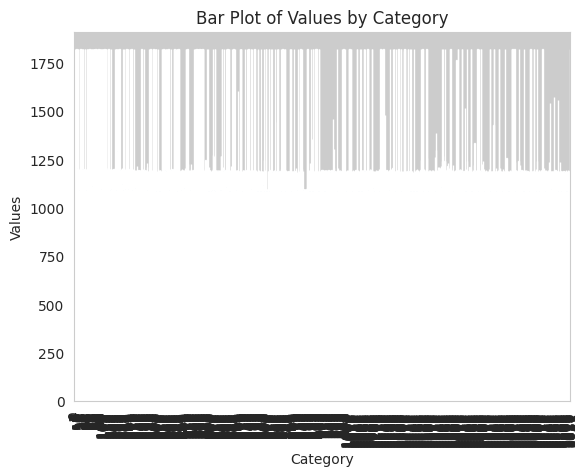

In [15]:
# Plot the 'Values' column as a bar plot
x.plot(kind='bar')
plt.title('Bar Plot of Values by Category')
plt.xlabel('Category')
plt.ylabel('Values')
plt.show()

In [201]:
random.seed(seed)
items = range(1, coords_df.shape[0])
# Number of times to randomly select and remove elements
iterations = 10
# Number of elements to select and remove each time
num_changes = 20
changed_nodes_dict = {}

# Perform the random selection and removal x times
for i in range(1, iterations + 1):
    if len(items) >= num_changes:
        selected_elements = random.sample(items, num_changes)
        changed_nodes_dict[i] = selected_elements
        items = [element for element in items if element not in selected_elements]
print(changed_nodes_dict)

{1: [242, 311, 106, 739, 406, 491, 159, 93, 69, 21, 412, 563, 940, 297, 820, 784, 61, 228, 533, 550], 2: [379, 292, 817, 183, 866, 114, 277, 226, 986, 970, 28, 868, 673, 846, 275, 839, 287, 205, 175, 328], 3: [317, 671, 926, 780, 913, 906, 939, 404, 94, 903, 649, 367, 717, 422, 545, 269, 193, 268, 510, 306], 4: [98, 890, 945, 600, 916, 335, 8, 991, 325, 626, 766, 962, 347, 924, 832, 559, 213, 457, 467, 654], 5: [326, 483, 505, 178, 258, 345, 290, 900, 883, 48, 89, 51, 517, 696, 316, 580, 596, 719, 526, 775], 6: [396, 163, 763, 221, 76, 473, 230, 723, 720, 504, 319, 208, 411, 499, 847, 670, 372, 722, 637, 224], 7: [384, 118, 978, 71, 824, 265, 331, 889, 681, 716, 278, 140, 392, 202, 346, 541, 30, 47, 424, 811], 8: [100, 352, 875, 804, 400, 20, 395, 355, 394, 180, 925, 778, 497, 743, 809, 975, 92, 360, 740, 231], 9: [553, 368, 164, 309, 476, 732, 191, 420, 699, 11, 455, 54, 566, 204, 456, 957, 982, 454, 365, 698], 10: [123, 564, 259, 544, 141, 74, 78, 68, 921, 210, 749, 849, 185, 761, 50

In [202]:
coord_list = [coords_df]

orig_df = coords_df.copy()
for i, node_ids in changed_nodes_dict.items():
    update_df = topology.coords_sim(device_number, centers, X_dim_range, Y_dim_range, with_latency=True,
                                    c_coords=c_coords)
    update_df = update_df.loc[node_ids]
    orig_df.loc[update_df.index] = update_df
    coord_list.append(orig_df.copy())

len(coord_list)

11

In [203]:
changed_nodes_dict.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [204]:
t_label = "sim(1000)"
prim_df, c_coords, base_col, slot_columns, centroids, opt_k, sil = df_dict_topologies[t_label]
prim_df["weight_1"] = 1
num_clusters = prim_df["cluster"].nunique() - 1
prim_df

,x,y,latency,type,base,weight,capacity_100,capacity_90,capacity_80,capacity_70,capacity_60,capacity_50,capacity_40,capacity_30,capacity_20,capacity_10,capacity_5,capacity_1,cluster,weight_1
0,71.925332,25.565323,0.000000,coordinator,9223372036854775807,0,50,50,50,50,50,50,50,50,50,50,50,50,-1,1
1,24.775013,11.958341,49.074459,worker,9223372036854775807,1,50,48,49,44,42,54,40,34,34,73,27,77,1,1
2,5.770977,8.497964,68.320520,worker,9223372036854775807,1,50,53,48,42,44,59,52,57,42,34,11,27,11,1
3,30.952786,-3.329505,50.136420,worker,9223372036854775807,1,50,49,54,44,47,43,37,58,28,38,27,8,1,1
4,18.231240,4.925715,57.524334,worker,9223372036854775807,27,50,49,55,44,48,58,51,35,33,17,14,0,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,88.052679,11.635696,21.310228,worker,9223372036854775807,1,50,48,51,52,58,62,75,47,59,17,38,39,6,1
997,34.643330,-22.089226,60.505403,worker,9223372036854775807,1,50,52,50,47,50,48,40,48,28,27,30,119,16,1
998,20.830278,17.439655,51.737134,worker,9223372036854775807,1,50,49,47,57,53,57,66,38,26,99,94,154,11,1
999,36.871673,9.978153,38.362988,worker,9223372036854775807,12,50,50,49,53,40,54,33,38,44,79,59,4,19,1


In [205]:
coord_list[0]

,x,y,latency
0,71.925332,25.565323,0.000000
1,24.775013,11.958341,49.074459
2,5.770977,8.497964,68.320520
3,30.952786,-3.329505,50.136420
4,18.231240,4.925715,57.524334
...,...,...,...
996,88.052679,11.635696,21.310228
997,34.643330,-22.089226,60.505403
998,20.830278,17.439655,51.737134
999,36.871673,9.978153,38.362988


In [206]:
print("Required:", prim_df["weight"].sum(), "Available:", prim_df["capacity_100"].sum())
colors, light_colors, palette = util.get_color_list(opt_k)
palette

Required: 5971 Available: 50050


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

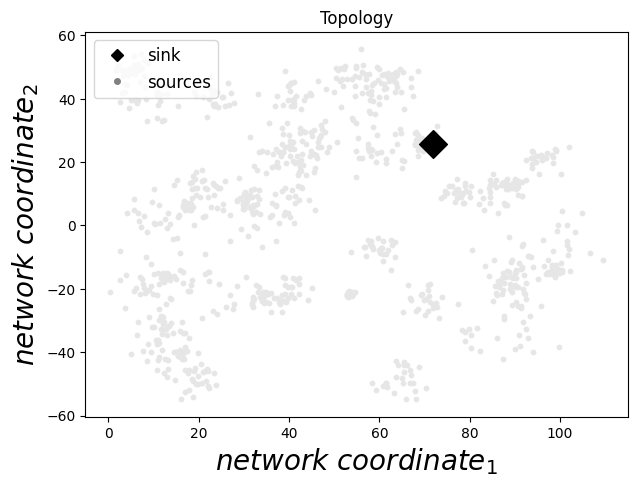

In [207]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))
ax1 = util.plot_topology(ax1, prim_df, scale_fac=0.1)

X_dim = ax1.get_xlim()
Y_dim = ax1.get_ylim()

# plt.savefig("plots/sim_1000/sim_" + str(device_number - 1) + "_ncs.svg", bbox_inches="tight")

plt.show()

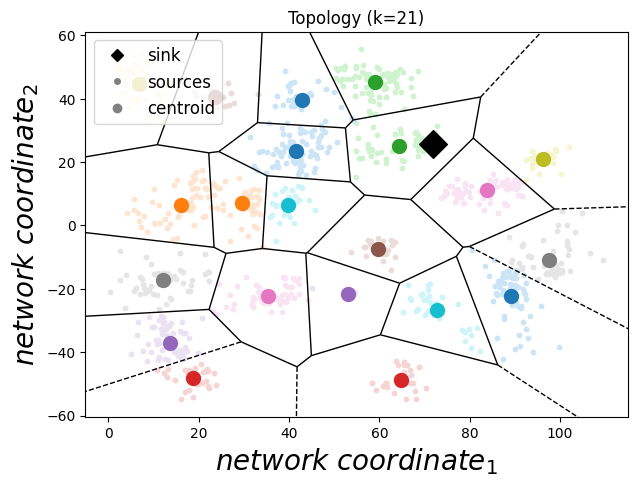

In [208]:
fig, (ax1) = plt.subplots(1, 1, figsize=(7, 5))

ax1 = util.plot_topology(ax1, prim_df, colors=colors, title='Topology (k=' + str(opt_k) + ")", scale_fac=0.1,
                         plot_voronoi=True, plot_centroid=True)

ax1.set_xlim(X_dim)
ax1.set_ylim(Y_dim)

# plt.savefig("plots/sim_1000/sim_" + str(device_number - 1) + "_ncs_grouped.svg", bbox_inches="tight")

plt.show()

## Changing Topology

In [209]:
param_dict = {
    "weight_1": {"merge_factor": 0.1, "step_size": 0.3},
    "weight_2": {"merge_factor": 0.9, "step_size": 0.2},
    "weight": {"merge_factor": 0.4, "step_size": 0.4},
}

In [210]:
# for the plots and vanilla NEMO
eval_name = "nemo_dc"
slot_col = "capacity_100"
weight_col = "weight"

evaluations = []
evaluations_full = []
placement_df = None

for i, coords_df in enumerate(coord_list):
    df = prim_df.copy()
    df["x"] = coords_df["x"]
    df["y"] = coords_df["y"]
    df["latency"] = coords_df["latency"]
    df["weight_1"] = 1
    df.loc[0, "weight_1"] = 0
    df, centroids, opt_k, sil = topology.add_kmeans_labels(df, kmin=num_clusters, kmax=num_clusters)
    
    eval_matrix, df_dict, opt_dict, limits_dict = evaluate_nemo(df, [slot_col], weight_col,
                                               merge_factor=param_dict[weight_col][
                                                   "merge_factor"],
                                               step_size=param_dict[weight_col]["step_size"],
                                               with_eval=True)
    if i == 0:
        placement_df = df_dict[slot_col].copy()
    
    evaluations_full.append(eval_matrix[slot_col])
    
    if i > 0:
        update_df = coords_df[["x", "y"]]
        df = util.update_coordinates(placement_df, update_df)
        edf = evaluate(df)
    else:
        edf = eval_matrix[slot_col]
    evaluations.append(edf)

Optimal k is 21
Starting nemo for: c=capacity_100, w=weight, l=20, step_size=0.4, merge_factor=0.4
Level 0 CH number:  1000
--------Balancing load for 21 clusters to 0
Clusters processed: 0
Clusters processed: 10
Clusters processed: 20
Level 1 CH number:  132
--------Balancing load for 8 clusters to 0
Clusters processed: 0
Level 2 CH number:  27
--------Balancing load for 3 clusters to 0
Clusters processed: 0
Level 3 CH number:  7
Evaluating for capacity_100
Optimal k is 21
Starting nemo for: c=capacity_100, w=weight, l=20, step_size=0.4, merge_factor=0.4
Level 0 CH number:  1000
--------Balancing load for 21 clusters to 0
Clusters processed: 0
Clusters processed: 10
Clusters processed: 20
Level 1 CH number:  130
--------Balancing load for 8 clusters to 0
Clusters processed: 0
Level 2 CH number:  34
--------Balancing load for 3 clusters to 0
Clusters processed: 0
Level 3 CH number:  6
Evaluating for capacity_100
Optimal k is 21
Starting nemo for: c=capacity_100, w=weight, l=20, step_si

In [211]:
s = 3
evaluations[s]

,latency_distribution,received_packets
0,0.000000,12.0
620,13.457146,38.0
137,11.985064,9.0
101,19.826119,50.0
100,4.087051,50.0
...,...,...
366,15.917709,0.0
367,99.588647,0.0
369,91.288547,0.0
370,49.449906,0.0


In [212]:
evaluations_full[s]

,latency_distribution,received_packets
0,0.000000,32.0
137,11.985064,2.0
344,9.096288,50.0
673,8.848443,50.0
385,4.000835,34.0
...,...,...
369,91.568449,0.0
370,49.467386,0.0
371,59.826488,0.0
372,55.197408,0.0


## Evaluation

#### Latency

In [213]:
eval_colors = {
    "dt": colors[0],
    "leach": colors[1],
    "mst": colors[2],
    "chain": colors[3],
    "nemo": colors[4],
    "nemo_base": colors[4],
    "nemo_dc_base": colors[4],
    "NEMO_base": colors[4],
    "nemo_rc": colors[5],
    "nemo_rc_base": colors[5],
    "nemo (rdm groups)_base": colors[5],
    "nemo_dc": colors[6],
    "NEMO+redistribution": colors[6],
    "nemo_pen": colors[7],
    "nemo_pen_base": colors[8],
    "nemo_dc_weight_2": colors[9],
    "nemo_dc_weight": colors[10]
}

renaming_dict = {
    "nemo_dc": "nemo (w=1,",
    "nemo_dc_weight_2": "nemo (w=2,",
    "nemo_dc_weight": "nemo (w=ln[1, 50],",
}


In [214]:
coord_list[0]

,x,y,latency
0,71.925332,25.565323,0.000000
1,24.775013,11.958341,49.074459
2,5.770977,8.497964,68.320520
3,30.952786,-3.329505,50.136420
4,18.231240,4.925715,57.524334
...,...,...,...
996,88.052679,11.635696,21.310228
997,34.643330,-22.089226,60.505403
998,20.830278,17.439655,51.737134
999,36.871673,9.978153,38.362988


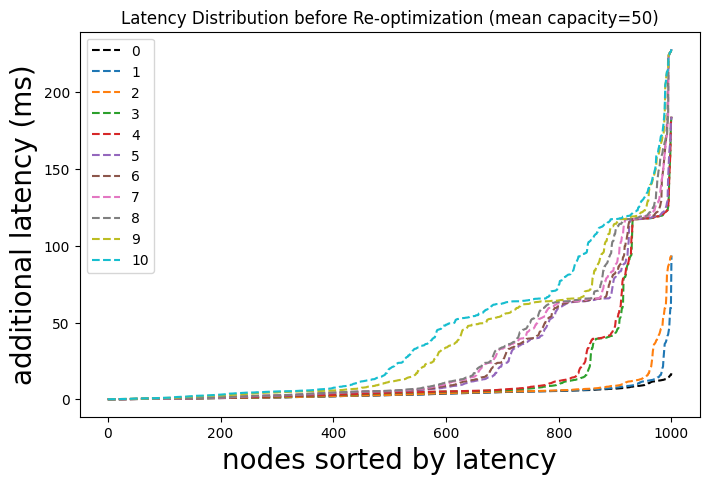

Means:  {'0': 3.39, '1': 4.08, '2': 5.36, '3': 15.59, '4': 16.3, '5': 24.75, '6': 26.47, '7': 27.94, '8': 29.45, '9': 36.73, '10': 42.14}
Quantiles:  {'0': 6.88, '1': 7.53, '2': 8.72, '3': 42.93, '4': 47.76, '5': 79.37, '6': 82.08, '7': 87.48, '8': 107.81, '9': 114.28, '10': 117.4}


In [215]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharey="all")
quant_dict = {}
mean_dict = {}

for i, df in enumerate(evaluations):
    l = str(i)
    sv = df["latency_distribution"] - coord_list[i]["latency"]
    sv = sv.sort_values()

    quant_dict[l] = round(sv.quantile(0.9), 2)
    mean_dict[l] = round(sv.mean(), 2)
    if i == 0:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--", color="black")
    else:
        sv.plot(ax=ax1, use_index=False, label=l, linestyle="--")

ax1.set_xlabel('nodes sorted by latency')
ax1.set_ylabel('additional latency (ms)')

ax1.legend(loc="upper left", prop={'size': 10})
# Display a figure.
# plt.ylim([0, 100])

ax1.yaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)
ylim_orig = ax1.get_ylim()

# plt.savefig("plots/sim_1000/eval_latency.svg")

ax1.set_title('Latency Distribution before Re-optimization (mean capacity=' + str(avg) + ")")
plt.show()
print("Means: ", mean_dict)
print("Quantiles: ", quant_dict)

## Test Reoptimization

In [219]:
i = 0
ndf = prim_df.copy()
ndf["x"] = coord_list[i]["x"]
ndf["y"] = coord_list[i]["y"]

nemo = NemoSolver(ndf, slot_col, weight_col, max_levels=50, step_size=param_dict[weight_col]["step_size"],
                  merge_factor=param_dict[weight_col]["merge_factor"])
df, opts, limits = nemo.nemo_full()

edf = util.evaluate(df)
evaluations[i] = edf
print(df["oindex"].nunique())
df

Level 0 CH number:  1000
--------Balancing load for 21 clusters to 0
Clusters processed: 0
Clusters processed: 10
Clusters processed: 20
Level 1 CH number:  131
--------Balancing load for 8 clusters to 0
Clusters processed: 0
Level 2 CH number:  33
--------Balancing load for 3 clusters to 0
Clusters processed: 0
Level 3 CH number:  8
--------Balancing load for 1 clusters to 0
Clusters processed: 0
Level 4 CH number:  2
1001


,oindex,x,y,type,cluster,total_weight,unbalanced_weight,used_weight,total_capacity,free_capacity,level,parent,load
0,0,71.925332,25.565323,coordinator,-1,<NA>,<NA>,<NA>,50,48,5,<NA>,2
1,1,24.775013,11.958341,worker,1,1,0,1,50,50,0,401,0
2,2,5.770977,8.497964,worker,11,1,0,1,50,50,0,896,0
3,3,30.952786,-3.329505,worker,1,1,0,1,50,50,0,401,0
4,4,18.231240,4.925715,worker,11,27,0,7,50,50,0,320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,997,34.643330,-22.089226,worker,16,1,0,1,50,50,0,64,0
1101,998,20.830278,17.439655,worker,11,1,0,1,50,50,0,999,0
1102,999,36.871673,9.978153,worker,19,12,0,7,50,32,1,623,18
1103,999,36.871673,9.978153,worker,19,12,0,5,50,32,1,954,18


In [220]:
for i, nodes in changed_nodes_dict.items():
    print("Iteration", i)
    print("Nodes", nodes)
    df_re, opt_dict, resource_limit, level = nemo.remove_nodes(nodes)
    new_nodes = list()
    for node_idx in nodes:
        node = prim_df.iloc[node_idx].to_dict()
        node["x"] = coord_list[i].iloc[node_idx]["x"]
        node["y"] = coord_list[i].iloc[node_idx]["y"]
        node["capacity"] = node[slot_col]
        node["weight"] = node[weight_col]
        node["oindex"] = node_idx
        new_nodes.append(node)
        node_idx, df_re, resource_limit = nemo.add_node(node)
    #df_re, opt_dict, resource_limit, level = nemo.add_nodes(new_nodes, full_opt=True)
    if resource_limit:
        print("Resource Limit!!!!!!!!!")
    
    update_df = coord_list[i][["x", "y"]]
    df = util.update_coordinates(df_re, update_df)
    edf = evaluate(df)
    evaluations[i] = edf.copy()

Iteration 1
Nodes [242, 311, 106, 739, 406, 491, 159, 93, 69, 21, 412, 563, 940, 297, 820, 784, 61, 228, 533, 550]
Node with ID [406, 297, 784, 61] are cluster head. Re-optimizing children with level 0: {0: [961, 965, 870, 765], 12: [684, 694, 126], 14: [513, 900, 273, 790, 797, 164, 549, 565, 695, 319, 854, 96], 15: [392]}
Level 0 CH number:  20
--------Balancing load for 4 clusters to 0
Clusters processed: 0
Level 1 CH number:  10
--------Balancing load for 1 clusters to 0
Clusters processed: 0
Level 2 CH number:  5
Adding node with index 242
Adding node with index 311
Adding node with index 106
Adding node with index 739
Adding node with index 406
balancing required for clusters [19]
reoptimizing clusters dict_keys([19])
Level 1 CH number:  27
--------Balancing load for 1 clusters to 0
Clusters processed: 0
Level 2 CH number:  9
--------Balancing load for 1 clusters to 0
Clusters processed: 0
Level 3 CH number:  2
--------Balancing load for 1 clusters to 0
Clusters processed: 0
Leve

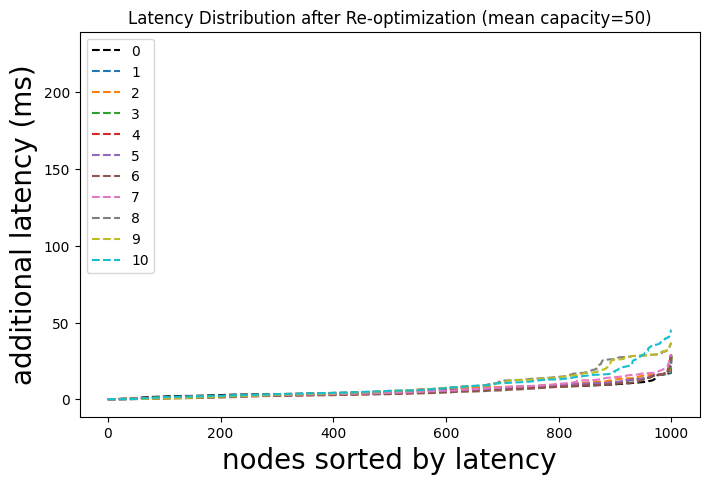

Means:  {'0': 5.57, '1': 5.79, '2': 6.07, '3': 5.2, '4': 5.15, '5': 5.32, '6': 4.65, '7': 6.07, '8': 9.0, '9': 8.57, '10': 8.5}
Quantiles:  {'0': 9.64, '1': 11.2, '2': 12.83, '3': 10.85, '4': 10.87, '5': 10.99, '6': 9.98, '7': 14.39, '8': 26.16, '9': 25.72, '10': 18.0}


In [221]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5), sharey="all")
quant_dict = {}
mean_dict = {}

for i in range(len(evaluations)):
    l = str(i)
    s1 = evaluations[i].sort_index()["latency_distribution"]
    s2 = coord_list[i].sort_index()["latency"]
    sv = (s1 - s2).sort_values()

    quant_dict[l] = round(sv.quantile(0.9), 2)
    mean_dict[l] = round(sv.mean(), 2)
    sv = sv.to_numpy()

    if i == 0:
        ax1.plot(sv, label=l, linestyle="--", color="black")
    else:
        ax1.plot(sv, label=l, linestyle="--")

ax1.set_xlabel('nodes sorted by latency')
ax1.set_ylabel('additional latency (ms)')

ax1.legend(loc="upper left", prop={'size': 10})
# Display a figure.
# plt.ylim([0, 100])

ax1.yaxis.label.set_size(20)
ax1.xaxis.label.set_size(20)

ax1.set_ylim(ylim_orig)

# plt.savefig("plots/sim_1000/eval_latency.svg")

ax1.set_title('Latency Distribution after Re-optimization (mean capacity=' + str(avg) + ")")
plt.show()
print("Means: ", mean_dict)
print("Quantiles: ", quant_dict)